In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline

orders=  pd.read_csv("/home/cloudera/Desktop/kaggle/orders.csv")
ord_prior = pd.read_csv("/home/cloudera/Desktop/kaggle/order_products__prior.csv")
products = pd.read_csv("/home/cloudera/Desktop/kaggle/products.csv")
departments= pd.read_csv("/home/cloudera/Desktop/kaggle/departments.csv")
aisles = pd.read_csv("/home/cloudera/Desktop/kaggle/aisles.csv")

In [6]:
ord_train= pd.read_csv("/home/cloudera/Desktop/kaggle/order_products__train.csv")

In [5]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
ord_prod_all = pd.concat([ord_train,ord_prior],axis=0)

In [15]:
print len(ord_prod_all)
print ord_prod_all.shape

33819106
(33819106, 4)


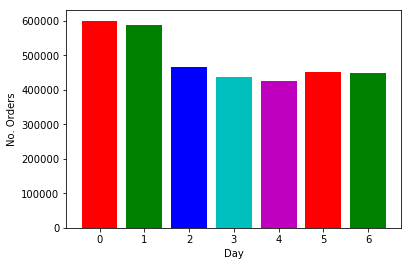

In [44]:
## Calculating the fequency orders per day 
x= orders.groupby(orders.order_dow).size()
days = range(0,7)
colors = ['r', 'g', 'b', 'c', 'm']
plt.bar(days,x,color = colors)

plt.xlabel("Day")
plt.ylabel("No. Orders")
plt.show()

In [46]:
### Missing values 
orders_miss = (orders.isnull().sum()/ len(orders))*100
orders_miss

order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    6.027594
dtype: float64

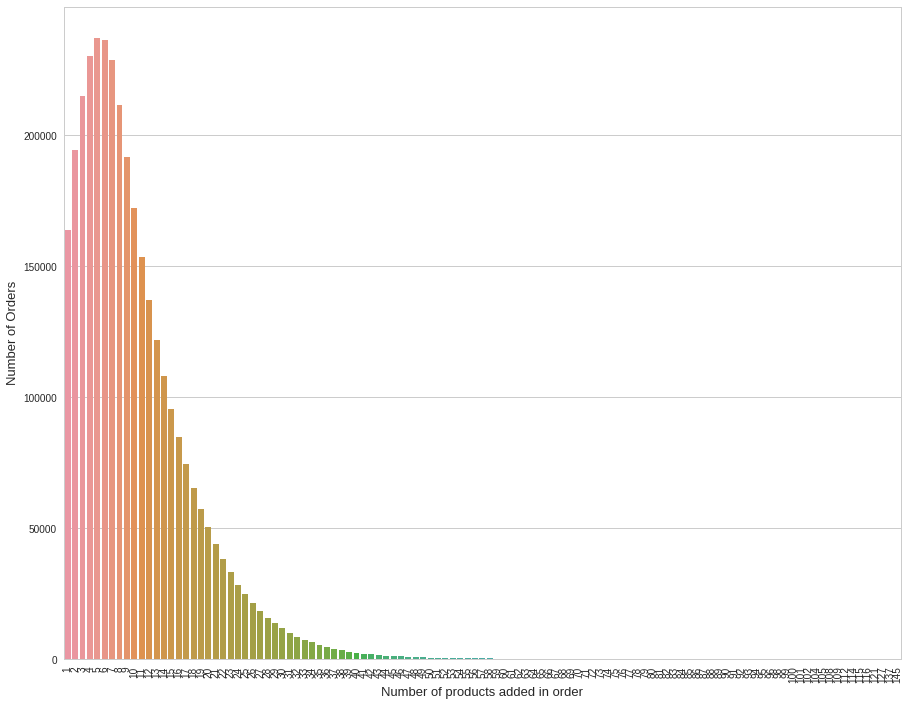

In [48]:
import seaborn as sns
grouped = ord_prod_all.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(grouped.index, grouped.values)
plt.ylabel('Number of Orders', fontsize=13)
plt.xlabel('Number of products added in order', fontsize=13)
plt.show()

In [64]:
grouped=ord_prod_all.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped= grouped.add_to_cart_order.value_counts()

grouped.index

Int64Index([  5,   6,   4,   7,   3,   8,   2,   9,  10,   1,
            ...
            127, 114, 116, 115, 137, 112, 105,  94,  90, 145],
           dtype='int64', length=113)

In [57]:
grouped

5      237225
6      236383
4      230299
7      228547
3      215060
8      211357
2      194361
9      191564
10     172103
1      163593
11     153495
12     136963
13     121714
14     108077
15      95475
16      84714
17      74468
18      65348
19      57290
20      50198
21      43720
22      38049
23      33134
24      28357
25      24692
26      21269
27      18348
28      15781
29      13667
30      11804
        ...  
88          7
86          7
85          5
81          5
83          4
87          4
89          4
100         4
91          4
93          4
98          4
95          4
102         3
96          3
99          2
101         2
104         2
108         2
109         2
121         1
127         1
114         1
116         1
115         1
137         1
112         1
105         1
94          1
90          1
145         1
Name: add_to_cart_order, Length: 113, dtype: int64